# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [24]:
%matplotlib inline
%pprint off

from __future__ import print_function, division

import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale
from skimage import morphology

from matplotlib import cm
from skimage.morphology import disk

Pretty printing has been turned ON


## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f440cb9b890>,
 <matplotlib.text.Text at 0x7f440c9f0150>)

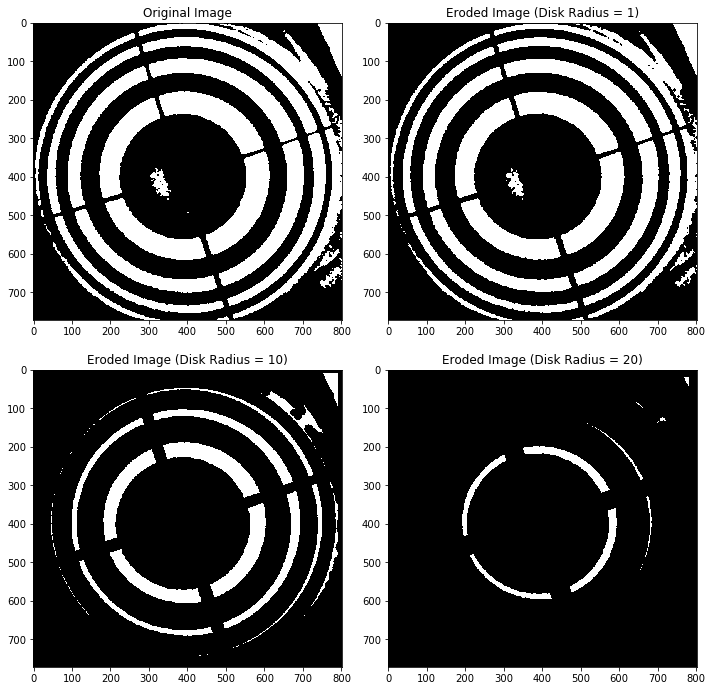

In [25]:
#Input
img = io.imread('./images/FindingContours.png')

#Erosion
erode_1 = morphology.binary_erosion(img, disk(1))
erode_10 = morphology.binary_erosion(img, disk(10))
erode_20 = morphology.binary_erosion(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(erode_1 , cmap=cm.gray),plt.title('Eroded Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(erode_10 , cmap=cm.gray),plt.title('Eroded Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(erode_20 , cmap=cm.gray),plt.title('Eroded Image (Disk Radius = 20)')


** Q.1.2 Dilation **

(<matplotlib.axes._subplots.AxesSubplot at 0x7f440c941310>,
 <matplotlib.text.Text at 0x7f440c6e0f90>)

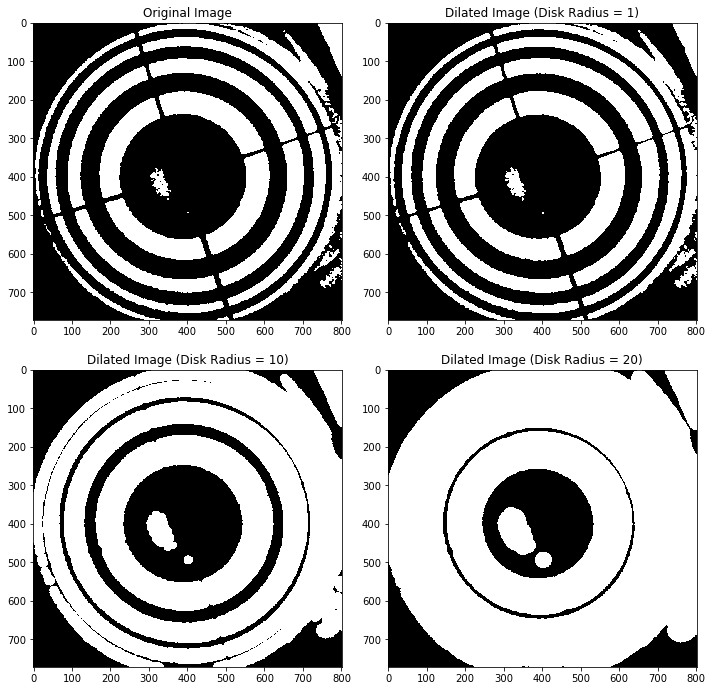

In [26]:
#Input
img = io.imread('./images/FindingContours.png')

#Dilation
dilate_1 = morphology.binary_dilation(img, disk(1))
dilate_10 = morphology.binary_dilation(img, disk(10))
dilate_20 = morphology.binary_dilation(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(dilate_1 , cmap=cm.gray),plt.title('Dilated Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(dilate_10 , cmap=cm.gray),plt.title('Dilated Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(dilate_20 , cmap=cm.gray),plt.title('Dilated Image (Disk Radius = 20)')


** Q.1.3 Opening **

(<matplotlib.axes._subplots.AxesSubplot at 0x7f440c5511d0>,
 <matplotlib.text.Text at 0x7f440c3f42d0>)

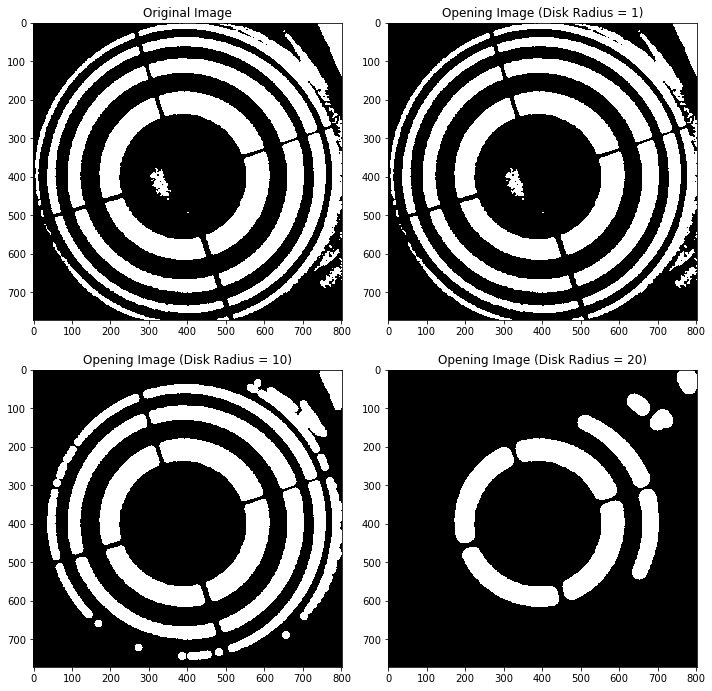

In [27]:
#Input
img = io.imread('./images/FindingContours.png')

#Opening
open_1 = morphology.binary_opening(img, disk(1))
open_10 = morphology.binary_opening(img, disk(10))
open_20 = morphology.binary_opening(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(open_1 , cmap=cm.gray),plt.title('Opening Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(open_10 , cmap=cm.gray),plt.title('Opening Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(open_20 , cmap=cm.gray),plt.title('Opening Image (Disk Radius = 20)')


** Q.1.4 Closing**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f440c56ced0>,
 <matplotlib.text.Text at 0x7f440c0e9a10>)

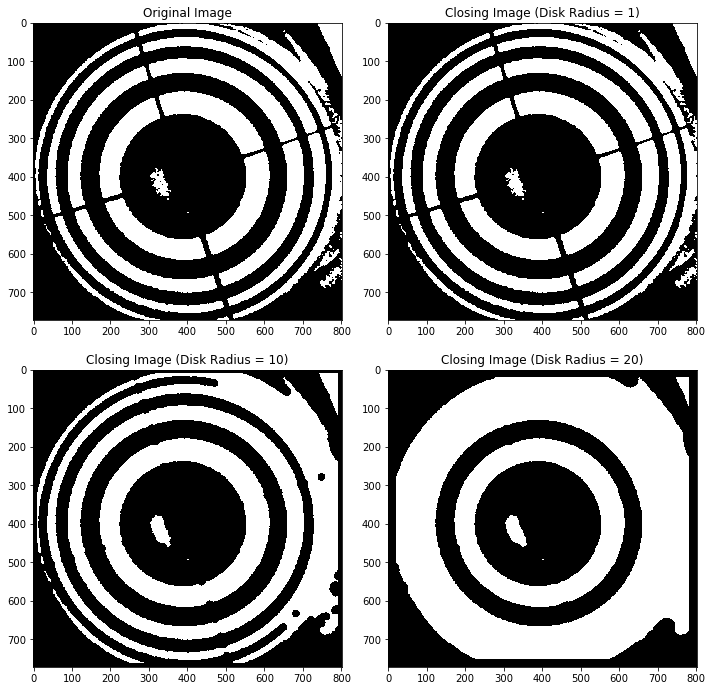

In [28]:
#Input
img = io.imread('./images/FindingContours.png')

#Closing
close_1 = morphology.binary_closing(img, disk(1))
close_10 = morphology.binary_closing(img, disk(10))
close_20 = morphology.binary_closing(img, disk(20))

# Display the Images
fig = plt.figure(figsize = (10, 10))

plt.subplot(221),io.imshow(img, cmap = cm.gray),plt.title('Original Image')
plt.subplot(222),io.imshow(close_1 , cmap=cm.gray),plt.title('Closing Image (Disk Radius = 1)')
plt.subplot(223),io.imshow(close_10 , cmap=cm.gray),plt.title('Closing Image (Disk Radius = 10)')
plt.subplot(224),io.imshow(close_20 , cmap=cm.gray),plt.title('Closing Image (Disk Radius = 20)')


** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

(<matplotlib.image.AxesImage at 0x7f440a61c310>,
 <matplotlib.text.Text at 0x7f440a5e2490>)

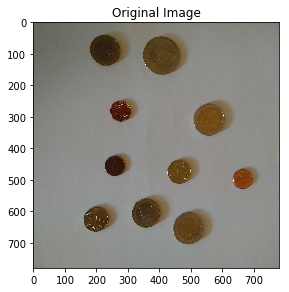

In [33]:
#Input
img = img_as_ubyte(io.imread('./images/coins.jpg'))
Scaled_img = rescale(img, .25)
io.imshow(Scaled_img, cmap = cm.gray),plt.title('Original Image')

**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

(<matplotlib.image.AxesImage at 0x7f440a473290>,
 <matplotlib.text.Text at 0x7f440a4bb190>)

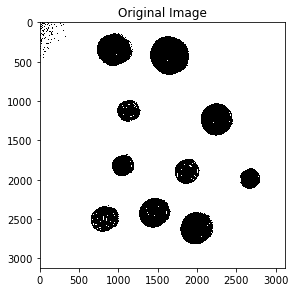

In [38]:
from skimage import filters

img_grey = rgb2gray(img)

threshold_global_otsu = filters.threshold_otsu(img_grey)
global_otsu = img_grey >= threshold_global_otsu
io.imshow(global_otsu),plt.title('Global Otsu Thresholding')

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

(<matplotlib.image.AxesImage at 0x7f440a39a2d0>,
 <matplotlib.text.Text at 0x7f440a34c390>)

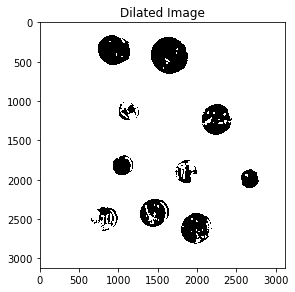

In [40]:
dilate_10 = morphology.binary_dilation(global_otsu, disk(10))

io.imshow(dilate_10),plt.title('Dilated Image')

**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 